# group stats and figs

In [5]:
import os, re
import pandas as pd
import numpy as np
import json
from scipy import stats

from helper_paper import *


from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 22

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

'40 blocked': '1000clq',
'interleaved': 'i1000cl',


### dataset names

In [96]:
# print df names
_ = get_sql_df(None,verb=True)

exp versions found in table:
10.13.18
1000cl
1000clq
9010cl
i1000cl
20B1000cl
RT01B1000cl
csw1000block40.04.07.19
csw1000block01.04.25.19
csw1000block02.04.26.19
csw1000rand50.04.29.19
csw1000block01intheloc.05.01.19
csw1000rand01.05.03.19
csw1000block02.05.07.19
csw1000boldmdp.05.09.19
csw1000insertedblock0.09.22.19
csw1000insertedblock1.09.30.19
csw1000insertedblock1.10.07.19
csw1000insertedblock0.10.08.19
csw1000insertedblock2.10.09.19
csw1000insertedblock2.10.10.19

-loading code version: csw1000insertedblock2.10.10.19
N = 56 subjects


### group line plot

In [3]:
exp_name = 'csw1000boldmdp.05.09.19'
block_size = 1

In [4]:
## load dataframes
sql_df = get_sql_df(exp_name,verb=False)
group_df = make_group_df(sql_df)
_,_,(_,group_qdf),(_,group_sdf) = group_df.groupby('type')
(_,group_fqdf),(_,group_tqdf) = group_qdf.groupby('qtype')

# thresholding
masked_group_tqdf = get_thresholded_tqdf(group_tqdf,group_fqdf,threshold=0.9)


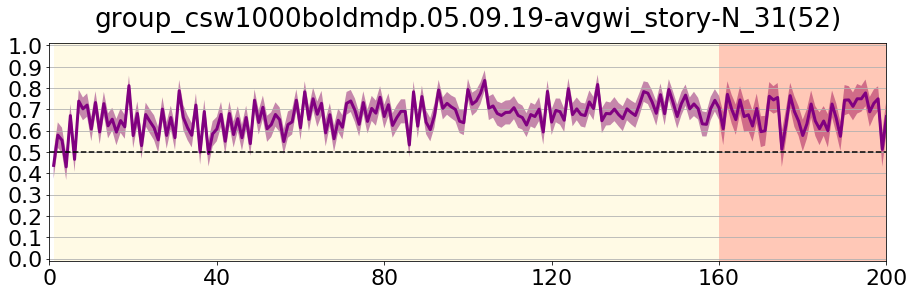

In [99]:
# num subjects
num_subs = len(masked_group_tqdf.index.get_level_values('subjnum').unique())
num_subs_total = len(group_df.groupby('subjnum'))

# group stats
grouping = 'story'
M = masked_group_tqdf.correct_response.groupby([grouping]).mean()
N = masked_group_tqdf.correct_response.groupby([grouping]).count()
S = masked_group_tqdf.correct_response.groupby([grouping]).std()/np.sqrt(N)

# plot stats
plt.figure(figsize=(15,4))
plt.plot(np.arange(len(M))+1,M,c='purple',lw=3)
plt.fill_between(np.arange(1,201),M-S,M+S,
                  facecolor='purple',alpha=0.5)


## plot background
if block_size==40: # blocked conditions
  if exp_name[:len("inserted_block_0")]=="inserted_block_0":
    cL = ['blue','green','purple','purple']
  elif exp_name[:len("inserted_block_0")]=="inserted_block_1":
    cL = ['purple','blue','green','purple']
  elif exp_name[:len("inserted_block_0")]=="inserted_block_2":
    cL = ['purple','purple','blue','green']
  else:
    cL = ['green','blue','green','blue']
  for idx,t1 in enumerate(range(0,160,block_size)):
    plt.fill_between(np.arange(t1,t1+block_size+1),-0.01,1.01,
                    facecolor=cL[idx],alpha=0.1)
else: # interleaved
  plt.fill_between(np.arange(1,160),-0.01,1.01,
                    facecolor='gold',alpha=0.1)
  
# test phase  
plt.fill_between(np.arange(160,201),-0.01,1.01,
                  facecolor='red',alpha=0.2)

## axes & titles
plt.axhline(0.5,c='black',ls='--')
plt.yticks(np.arange(0,1.1,.1))

plt.ylim(-0.01,1.01)
plt.grid(axis='y')

plt.xlim(0,200)
plt.xticks(np.arange(0,201,40))

title = 'group_%s-avgwi_%s-N_%i(%i)'%(exp_name,grouping,num_subs,num_subs_total)
plt.title(title,y=1.05)

plt.savefig('../presentations/paper/'+title+'.svg',format='svg')


# bar plots

In [3]:
## load and save subject mean test scores
dnameL = [
  'csw1000block40.04.07.19',
  'csw1000block01.04.25.19',
  'csw1000block02.04.26.19',
  'csw1000block01intheloc.05.01.19',
  'csw1000rand01.05.03.19',
  'csw1000block02.05.07.19',
  'csw1000boldmdp.05.09.19',
  'csw1000insertedblock0.09.22.19',
  'csw1000insertedblock1.09.30.19',
  'csw1000insertedblock1.10.07.19',
  'csw1000insertedblock0.10.08.19',
  'csw1000insertedblock2.10.09.19',
  'csw1000insertedblock2.10.10.19',
  '1000clq', 
  'i1000cl'
  ]

## save test scores 
# for idx in range(len(dnameL)):
#   dname = dnameL[idx]
#   sql_df = get_sql_df(dname,verb=False)
#   subj_scores = extract_subj_test_score(sql_df)
#   fname = 'mean_test_scores-'+dname
#   np.save('analysis_data/'+fname,subj_scores)

In [4]:
def load_test_scores(dname):
  return np.load('analysis_data/mean_test_scores-'+dname+'.npy')


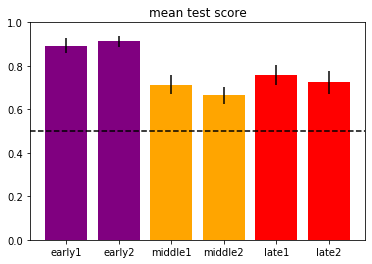

In [26]:
dnameL = [
  'csw1000insertedblock0.09.22.19',
  'csw1000insertedblock0.10.08.19',
  'csw1000insertedblock1.09.30.19',
  'csw1000insertedblock1.10.07.19',
  'csw1000insertedblock2.10.09.19',
  'csw1000insertedblock2.10.10.19'
    ]

ax = plt.gca()
cL = ['purple','purple','orange','orange','red','red']
for idx in range(len(dnameL)):
  dname = dnameL[idx]
  subj_scores = load_test_scores(dname)
  M = subj_scores.mean()
  S = subj_scores.std()/np.sqrt(len(subj_scores))
  ax.bar(idx,M,yerr=S,color=cL[idx])
ax.set_ylim(0,1)
ax.axhline(0.5,c='k',ls='--')
ax.set_xticklabels(['','early1','early2','middle1','middle2','late1','late2'])
ax.set_title('mean test score')
plt.savefig('figures/mean_test_score-insertedblocks')

# stats

In [3]:
## pairwise comparisons
L = [
#   ['csw1000block40.04.07.19','csw1000block01.04.25.19'],
#   ['1000clq','i1000cl'],
  
  ['csw1000insertedblock0.09.22.19','csw1000insertedblock1.09.30.19'],
  ['csw1000insertedblock0.10.08.19','csw1000insertedblock1.10.07.19'],
  
  ['csw1000insertedblock0.09.22.19','csw1000insertedblock2.10.09.19'],
  ['csw1000insertedblock0.10.08.19','csw1000insertedblock2.10.10.19'],
  
  ['csw1000insertedblock1.09.30.19','csw1000insertedblock2.10.09.19'],
  ['csw1000insertedblock1.10.07.19','csw1000insertedblock2.10.10.19'],
  
#   ['csw1000boldmdp.05.09.19','csw1000block01.04.25.19'],
#   ['csw1000boldmdp.05.09.19','csw1000block40.04.07.19'],
]

thresh = 0 # 0.9

for d1,d2 in L:
  print(d1,d2)
  sql_df1 = get_sql_df(d1,verb=False)
  sql_df2 = get_sql_df(d2,verb=False)
  group1 = extract_subj_test_score(sql_df1,thresh)
  group2 = extract_subj_test_score(sql_df2,thresh)
  
  print(stats.ttest_ind(group1,group2))
  print('N',group1.shape,group2.shape)
  print()


csw1000insertedblock0.09.22.19 csw1000insertedblock1.09.30.19
Ttest_indResult(statistic=2.511693166469391, pvalue=0.013538175432296401)
N (51,) (56,)

csw1000insertedblock0.10.08.19 csw1000insertedblock1.10.07.19
Ttest_indResult(statistic=1.8874729260665413, pvalue=0.061831956738248574)
N (57,) (51,)

csw1000insertedblock0.09.22.19 csw1000insertedblock2.10.09.19
Ttest_indResult(statistic=1.8115186202445415, pvalue=0.07306236613909425)
N (51,) (51,)

csw1000insertedblock0.10.08.19 csw1000insertedblock2.10.10.19
Ttest_indResult(statistic=3.4832452717591886, pvalue=0.0007098540775991783)
N (57,) (56,)

csw1000insertedblock1.09.30.19 csw1000insertedblock2.10.09.19
Ttest_indResult(statistic=-0.6089827934615418, pvalue=0.5438511918638216)
N (56,) (51,)

csw1000insertedblock1.10.07.19 csw1000insertedblock2.10.10.19
Ttest_indResult(statistic=1.6322494395599942, pvalue=0.10562250683854828)
N (51,) (56,)



In [3]:
# from zero
L = [
  'csw1000block40.04.07.19',
#   'csw1000block01.04.25.19',
#   'csw1000block01intheloc.05.01.19',
#   'csw1000boldmdp.05.09.19',
#   'csw1000insertedblock0.09.22.19',
#   'csw1000insertedblock1.09.30.19',
#   'csw1000insertedblock1.10.07.19',
#   'csw1000insertedblock0.10.08.19',
#   'csw1000insertedblock2.10.09.19',
#   'csw1000insertedblock2.10.10.19',
#   '1000clq', 
#   'i1000cl'
  ]


thresh = 0.9

for sql_df_name in L:
  print()
  print(sql_df_name)
  sql_df = get_sql_df(sql_df_name,verb=False)
  score = extract_subj_test_score(sql_df,thresh)
  print('M=',score.mean())
  print('S=',score.std())
  



csw1000block40.04.07.19
M= 0.9068910256410257
S= 0.12700813405464267


(26,)

# robustness test

In [24]:
## pairwise comparisons

L = [
  ['csw1000block40.04.07.19','csw1000block01.04.25.19'],
  ['1000clq','i1000cl']
]

thresh = 0

for d1,d2 in L:
  print(d1,d2)
  sql_df1 = get_sql_df(d1,verb=False)
  sql_df2 = get_sql_df(d2,verb=False)
  group1_scores = extract_subj_test_score(sql_df1,thresh)
  group2_scores = extract_subj_test_score(sql_df2,thresh)
  print('N1=',group1_scores.shape,'N2=',group2_scores.shape)
  print(stats.ttest_ind(group1_scores,group2_scores))
  print()


csw1000block40.04.07.19 csw1000block01.04.25.19
N1= (63,) N2= (56,)
Ttest_indResult(statistic=3.9782024145959705, pvalue=0.0001207596765935611)

1000clq i1000cl
N1= (53,) N2= (52,)
Ttest_indResult(statistic=5.392749448493545, pvalue=4.438040331791842e-07)



In [26]:
# from zero
L = [
  'csw1000block40.04.07.19',
  'csw1000block01.04.25.19',
  '1000clq', 
  'i1000cl'
  ]

thresh = 0

for sql_df_name in L:
  print()
  print(sql_df_name)
  sql_df = get_sql_df(sql_df_name,verb=False)
  score = extract_subj_test_score(sql_df,thresh)
  print('M=',score.mean(), 'N=',score.shape)
  print(stats.ttest_1samp(score,0.5))
  



csw1000block40.04.07.19
M= 0.7149470899470899 N= (63,)
Ttest_1sampResult(statistic=7.697118944488946, pvalue=1.3278517596962373e-10)

csw1000block01.04.25.19
M= 0.5755208333333333 N= (56,)
Ttest_1sampResult(statistic=3.802906694346378, pvalue=0.0003606600548681847)

1000clq
M= 0.8384433962264153 N= (53,)
Ttest_1sampResult(statistic=12.443675812799912, pvalue=3.2461998780418173e-17)

i1000cl
M= 0.630048076923077 N= (52,)
Ttest_1sampResult(statistic=4.737362237042627, pvalue=1.76937555790632e-05)


# extract mean and std time courses

In [6]:
def cond2code(CONDITION):
  if CONDITION == 'interleaved':
    dataset_code = 'i1000cl'
  elif CONDITION == 'interleaved_rep':
    dataset_code = 'csw1000block01.04.25.19'
  elif CONDITION == 'blocked':
    dataset_code = '1000clq'
  elif CONDITION == 'blocked_rep':
    dataset_code = 'csw1000block40.04.07.19'
  elif CONDITION == 'explicit_interleaved':
    dataset_code = 'csw1000boldmdp.05.09.19'
  elif CONDITION == 'inserted_early':
    dataset_code = 'csw1000insertedblock0.09.22.19'
  elif CONDITION == 'inserted_early_rep':
    dataset_code = 'csw1000insertedblock0.10.08.19'
  elif CONDITION == 'inserted_middle':
    dataset_code = 'csw1000insertedblock1.09.30.19'
  elif CONDITION == 'inserted_middle_rep':
    dataset_code = 'csw1000insertedblock1.10.07.19'
  elif CONDITION == 'inserted_late':
    dataset_code = 'csw1000insertedblock2.10.09.19'
  elif CONDITION == 'inserted_late_rep':
    dataset_code = 'csw1000insertedblock2.10.10.19'
  else:
    print("INVALID CONDITION")
    assert False
  return dataset_code

In [7]:
condL = ['interleaved',
'interleaved_rep',
'blocked',
'blocked_rep',
'explicit_interleaved',
'inserted_early',
'inserted_early_rep',
'inserted_middle',
'inserted_middle_rep',
'inserted_late',
'inserted_late_rep']


In [9]:
for cond in condL:
  dataset_code = cond2code(cond)

  ## load dataframes
  sql_df = get_sql_df(dataset_code,verb=False)
  group_df = make_group_df(sql_df)
  _,_,(_,group_qdf),(_,group_sdf) = group_df.groupby('type')
  (_,group_fqdf),(_,group_tqdf) = group_qdf.groupby('qtype')

  # thresholding
  masked_group_tqdf = get_thresholded_tqdf(group_tqdf,group_fqdf,threshold=0.9)

  # num subjects
  num_subs = len(masked_group_tqdf.index.get_level_values('subjnum').unique())
  num_subs_total = len(group_df.groupby('subjnum'))

  # group stats
  grouping = 'story'
  M = masked_group_tqdf.correct_response.groupby([grouping]).mean()
  S = masked_group_tqdf.correct_response.groupby([grouping]).std()
  N = masked_group_tqdf.correct_response.groupby([grouping]).count()
  # SAVE
  M.to_csv('analysis_data/timecourses/'+cond+'-mean.csv')
  S.to_csv('analysis_data/timecourses/'+cond+'-std.csv')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
